In [62]:
# Implementation of a grid search for minimising loss
# Start with getting dummy Xs and corresponding Ys
import numpy as np 
np.set_printoptions(suppress=True) # dont print every number in scientific form
import matplotlib.pyplot as plt
from sklearn import datasets
 
# Get regression data from scikit-learn
X, Y = datasets.make_regression(n_samples=20, n_features=1, noise=0.5)
Y= Y.reshape((20, 1))
print(X.shape)
print(Y.shape)
print(X)
print(Y)





(20, 1)
(20, 1)
[[ 1.76311241]
 [ 0.46296889]
 [-1.44717429]
 [-2.51902903]
 [-0.5961539 ]
 [ 0.47144683]
 [ 0.04490268]
 [-0.473727  ]
 [ 0.65470376]
 [ 1.04047985]
 [-0.98441802]
 [-0.36843082]
 [ 0.22435162]
 [-0.21021749]
 [-0.05851975]
 [-0.03718206]
 [-1.1854196 ]
 [ 0.05171331]
 [ 0.52101884]
 [ 1.04998246]]
[[ 41.15454625]
 [ 12.17538834]
 [-34.36960905]
 [-59.24647776]
 [-13.60023878]
 [ 10.28960117]
 [  1.59365169]
 [-11.23885949]
 [ 15.15209428]
 [ 24.51621124]
 [-23.54472985]
 [ -8.39730961]
 [  4.78505906]
 [ -4.44198011]
 [ -1.15717076]
 [ -0.90216921]
 [-28.9750843 ]
 [  1.79712815]
 [ 12.02923391]
 [ 25.31204888]]


In [63]:
# Define the loss function
def L(y_hat, labels): 
    errors = y_hat - labels 
    squared_errors = errors**2 
    mean_squared_error = sum(squared_errors)/len(labels) 
    return mean_squared_error

# Define the liner function
def linear(X, w, b):
    return X * w + b

# Define plotting function
def plot_h_vs_y(X, y_hat, Y):
    plt.figure()
    plt.scatter(X, Y, c='r', label='Label')
    plt.scatter(X, y_hat, c='b', label='Hypothesis', marker='x')
    plt.legend()
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()



In [67]:
# Define the grid search
def grid_search(n_samples, limit= 100):
    best_weight = 0
    best_bias = 0
    lowest_cost = float('inf')
    interval = limit*2/n_samples
    for i in range(n_samples):
        w = -limit + i * interval
        for j in range(n_samples):
            b = -limit + j * interval
            y_hat = linear(X, w, b)
            cost = L(y_hat, Y)
            if cost < lowest_cost:
                lowest_cost = cost
                best_weight = w
                bbest_bias = b
    print('Lowest cost of', lowest_cost, 'achieved with weight of', best_weight, 'and bias of', best_bias)
    return best_weight, best_bias

Lowest cost of [0.280333] achieved with weight of 23.60000000000001 and bias of 0


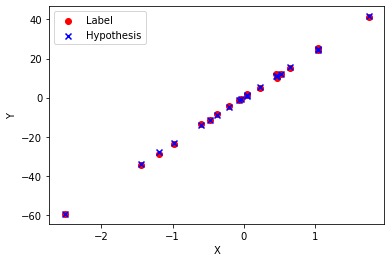

In [70]:
# Print results 
best_weight, best_bias = grid_search(1000) ## do 1000 samples in a random search 
plot_h_vs_y(X, linear(X, best_weight, best_bias), Y) # plot model predictions agains labels